In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import welch
import scipy

In [2]:
channels = ['ch_'+str(i) for i in range(1,15)]

In [3]:
def cal_fft(data):
    # Apply FFT
    length = len(data)
    fs = 128
    eeg_fft = np.abs(np.fft.fft(data))/length

    freq_plot = fs * np.arange(0, (length/2)+1)  / length

    eeg_fft_plot =  eeg_fft[0 :int( length/2+1)]

    eeg_fft_plot[1:-1] = 2*eeg_fft_plot[1:-1]

    # Plot the EEG power spectrum
#     plt.figure(figsize=(20, 10))
#     plt.plot(freq_plot,eeg_fft_plot)
#     plt.xlabel('Frequency (Hz)')
#     plt.ylabel('Amplitude')
#     plt.title('EEG Power Spectrum')
#     plt.grid(True)
#     plt.show()
    return eeg_fft_plot

In [5]:
import os
directory = "modified_data/"   #first normalize then clean
for filename in os.listdir(directory):
    data = pd.read_csv(f'{directory}/{filename}')
    label = data['label'][0]
    fft = pd.DataFrame()
    for i in channels:
        ch_fft = cal_fft(data[i])
        fft[i] = ch_fft
    fft['label'] = label
    fft.to_csv(f'modified_data_fft/{filename[:-4]}.csv',index = False)

In [7]:
d = pd.read_csv('alpha.csv')

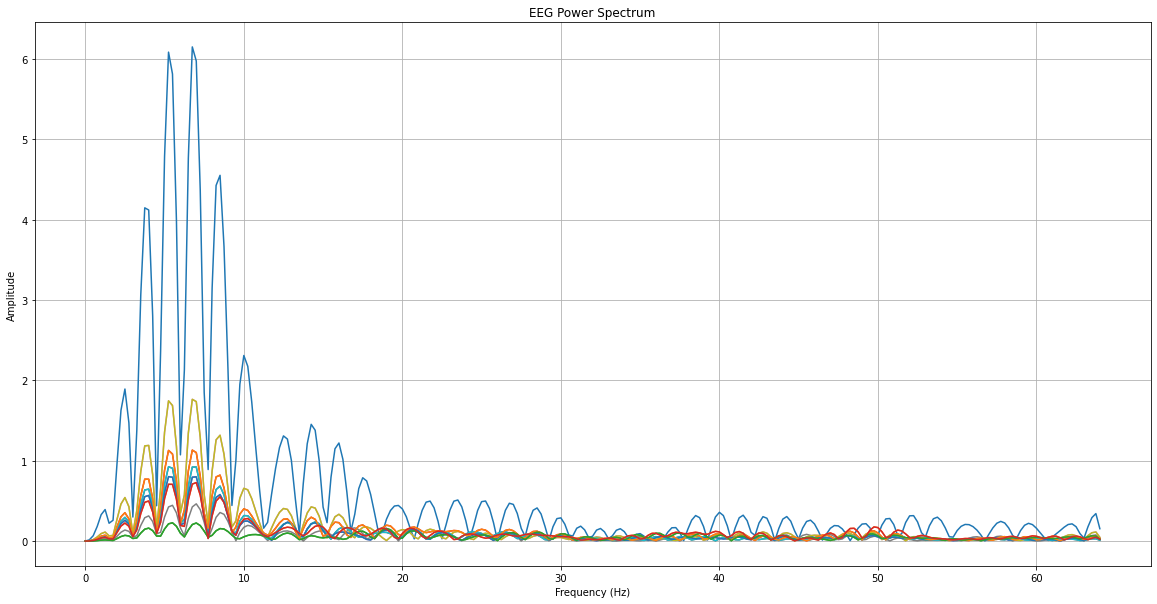

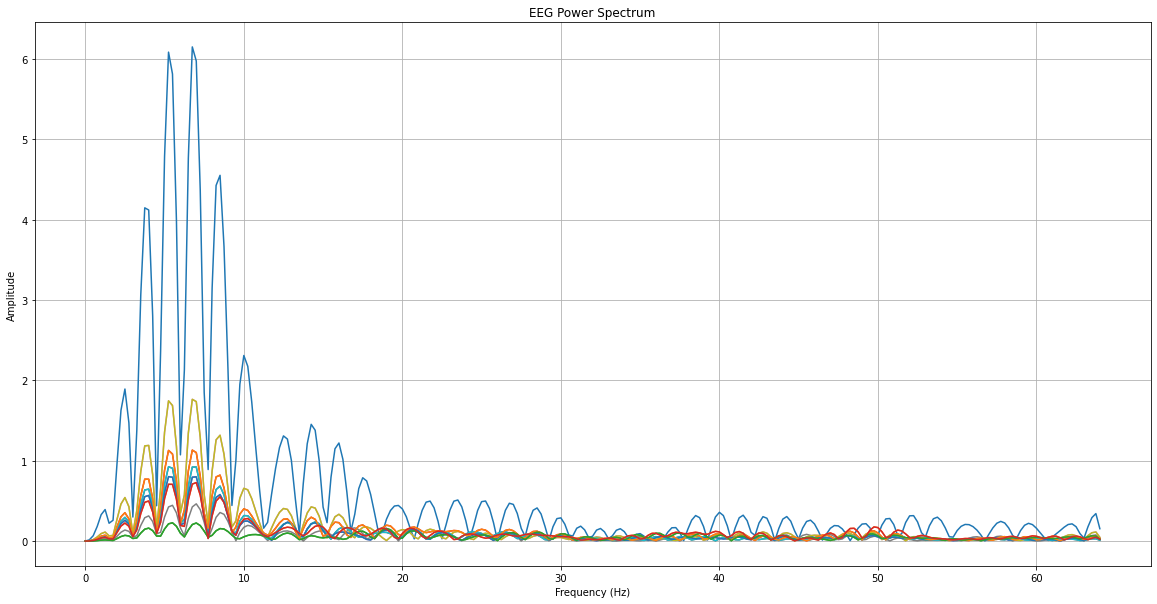

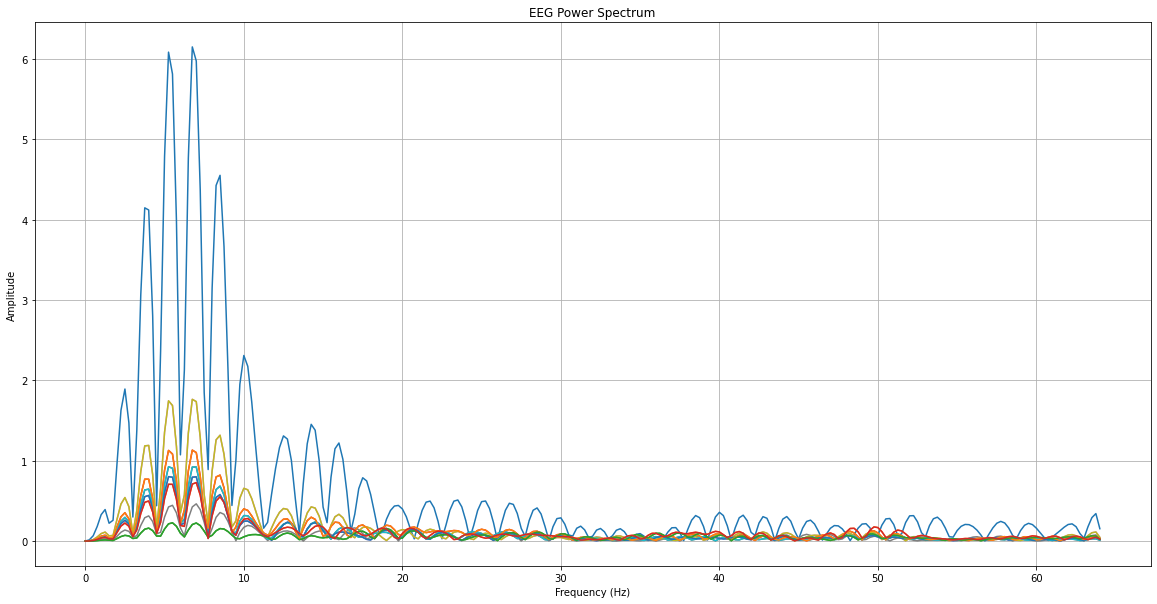

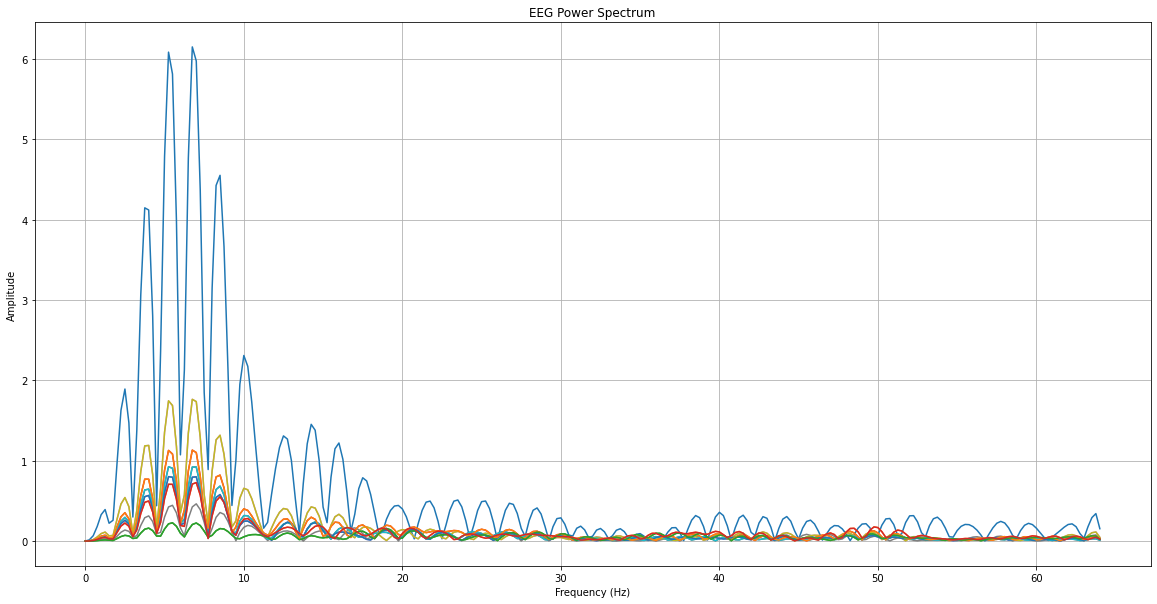

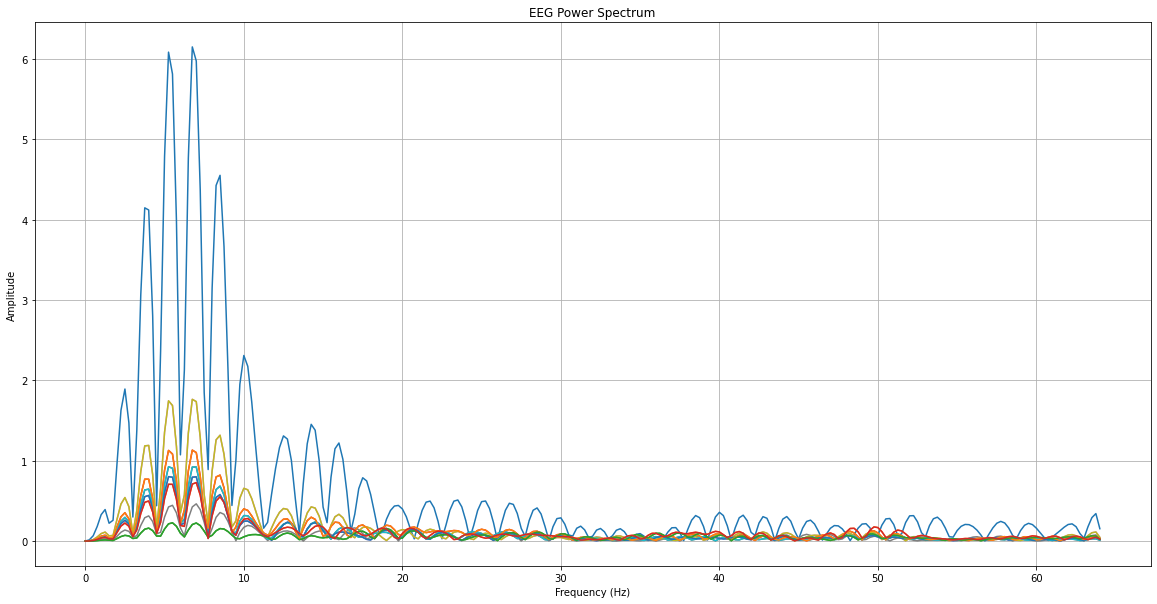

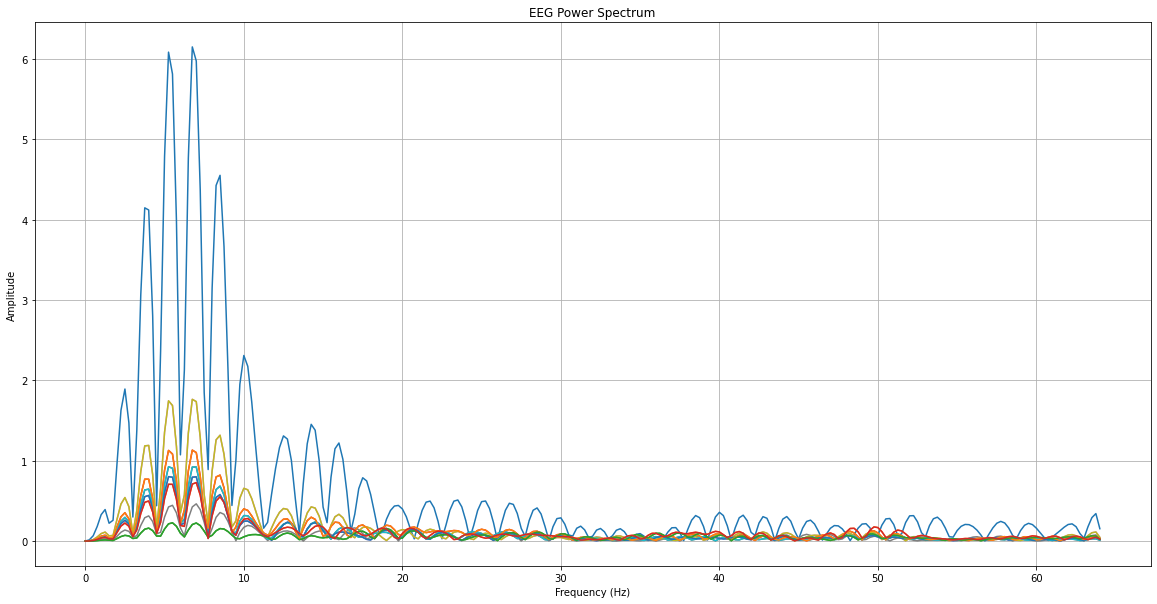

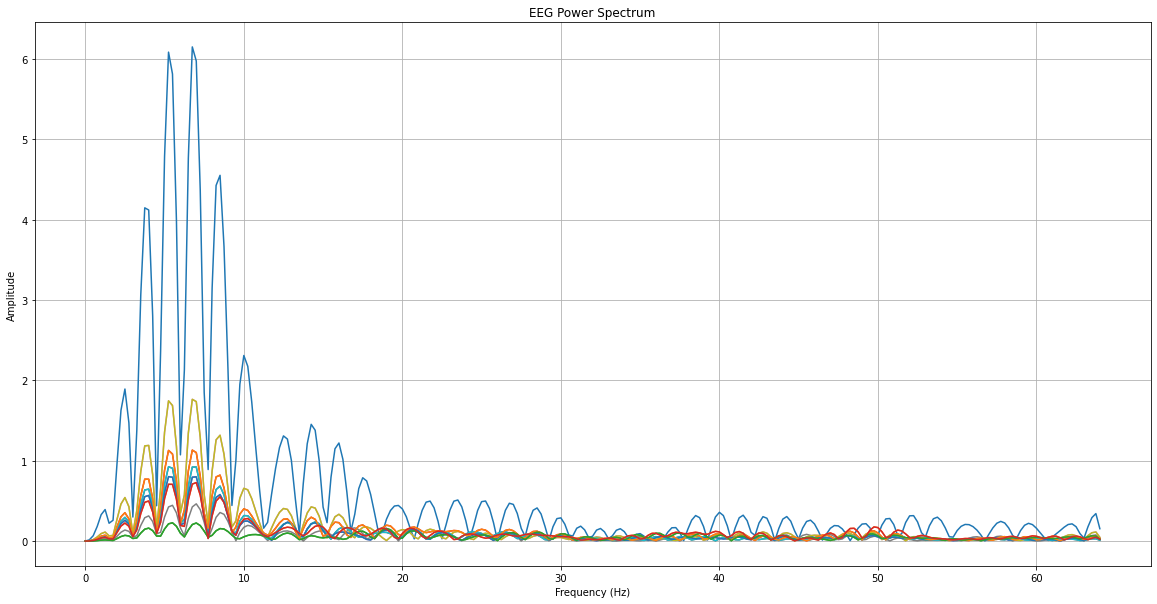

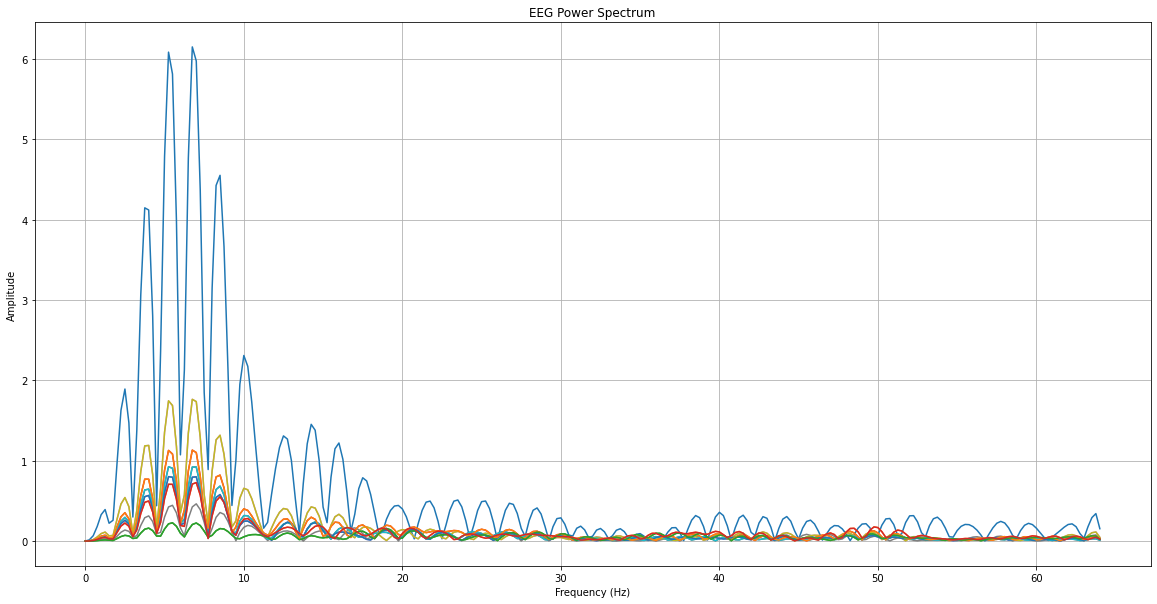

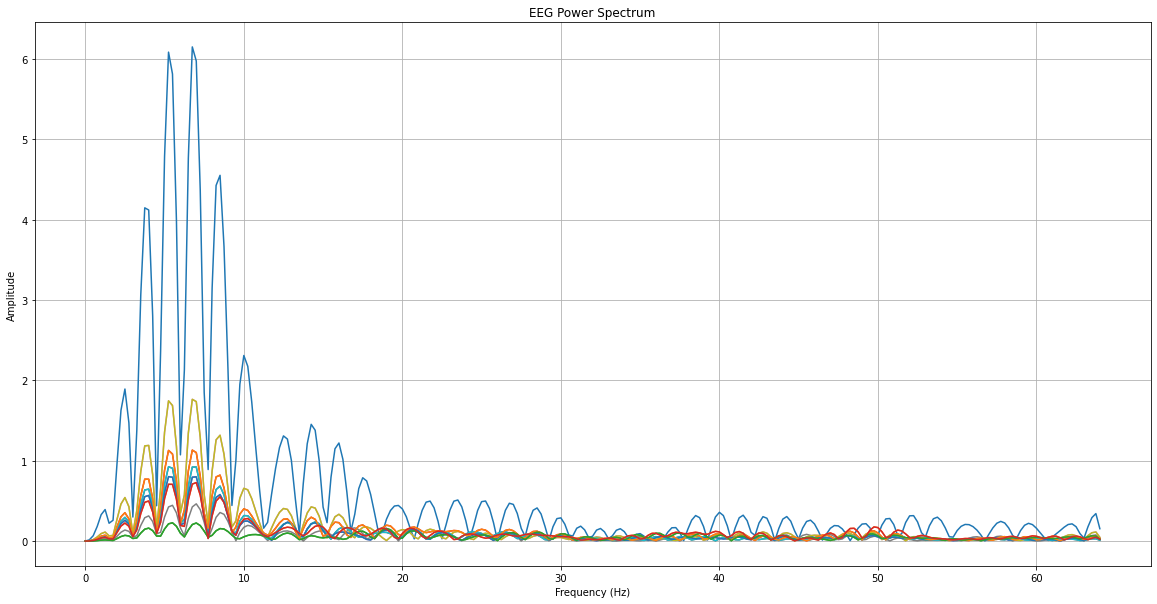

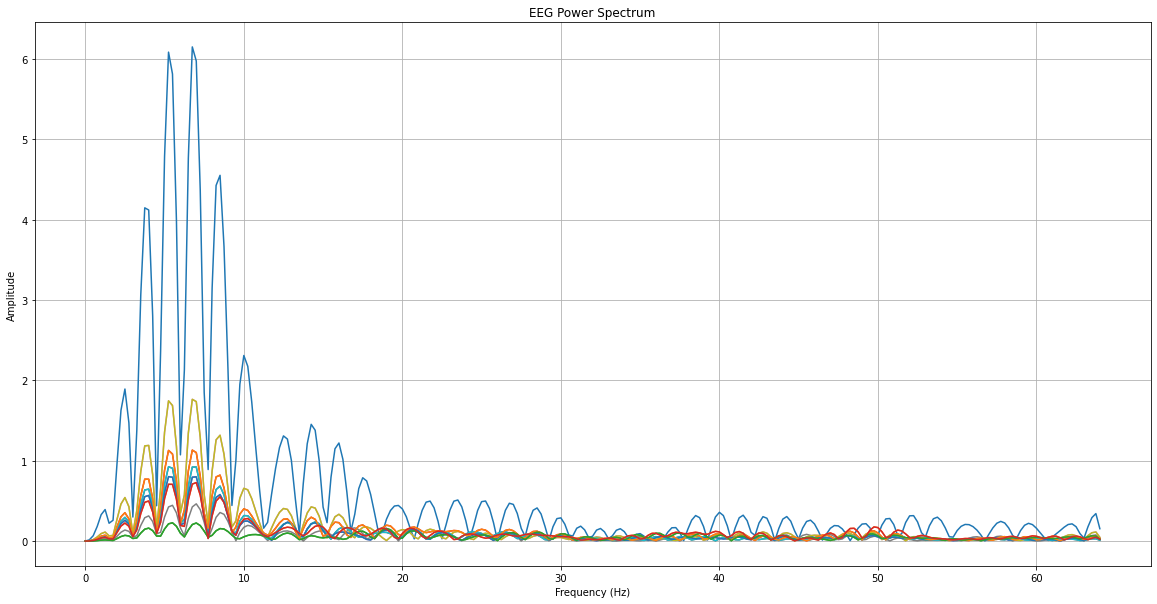

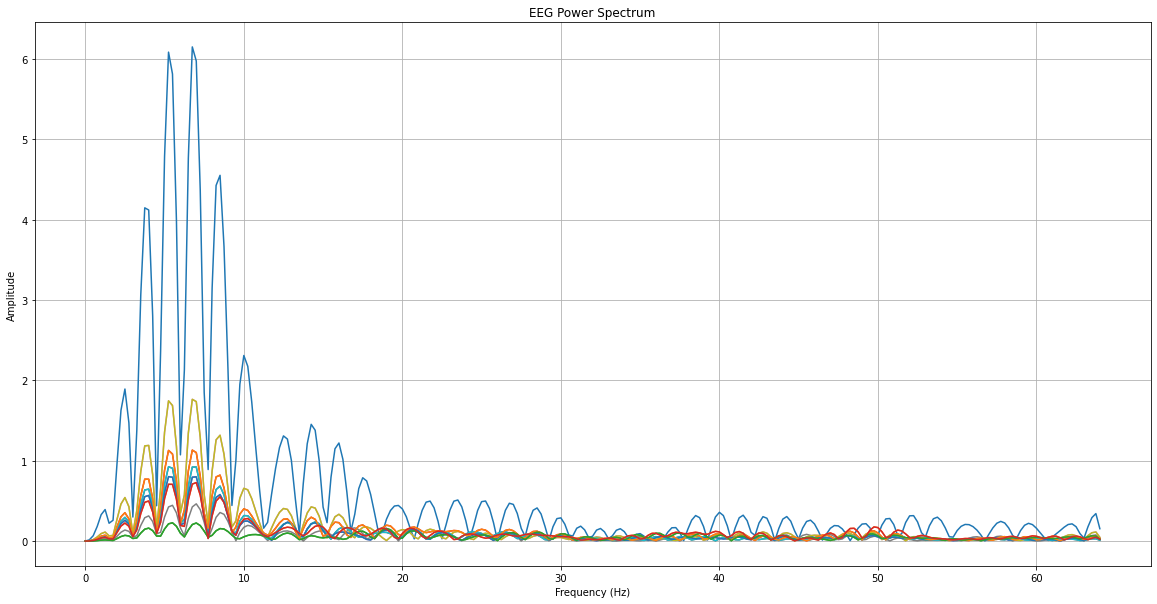

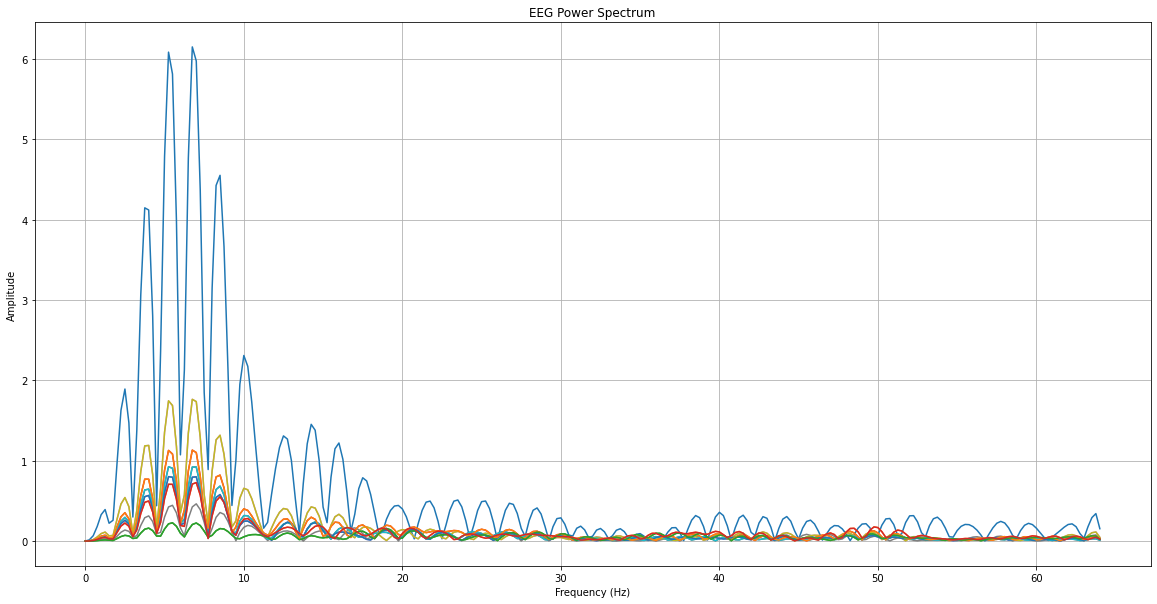

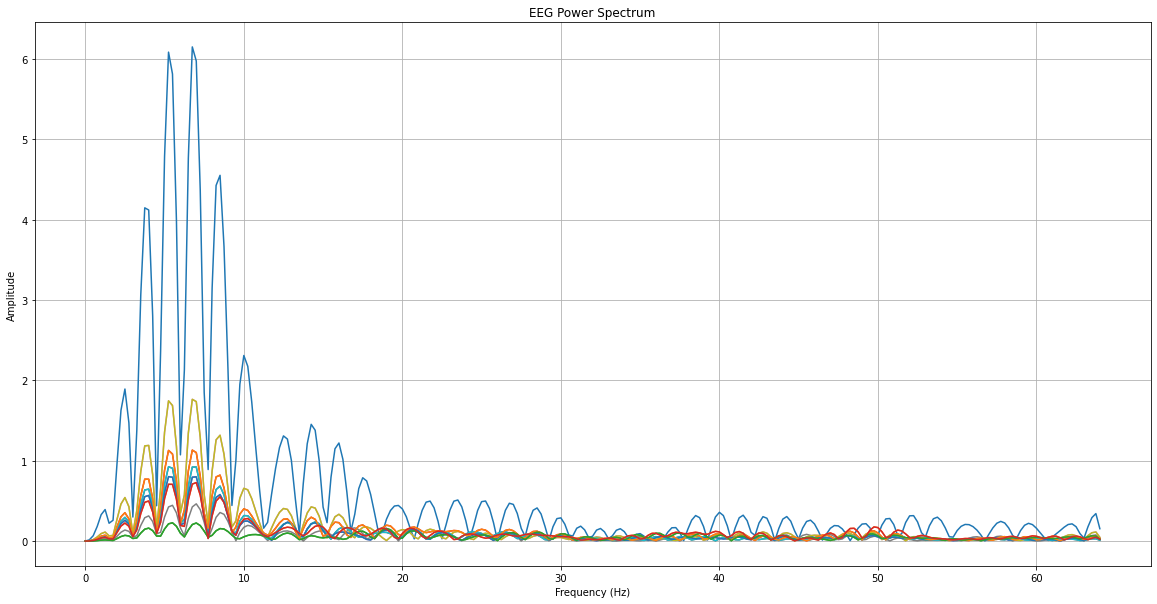

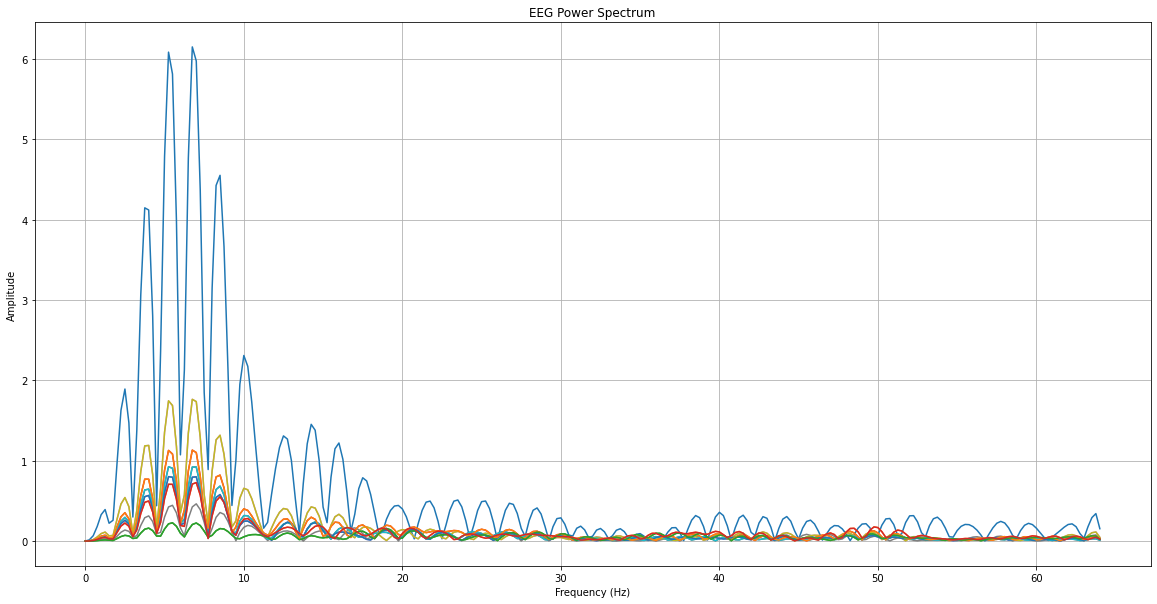

In [8]:
for i in channels:
    f = cal_fft(d[channels])